<a href="https://colab.research.google.com/github/boramkim0514/AI-Group-Project/blob/main/%20Presentation_DataAnalysis_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 가설 세우기
 미혼 여성보다 기혼 여성의 생존률이 높을 것이다

# 2. 데이터 전처리 
** 이름 컬럼에서 파이썬으로 특정 문자열(Miss, Mrs.) 분리 색인 
 

In [45]:
!apt -qq -y install fonts-nanum > /dev/null
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [32]:
 
# csv 파일 불러오기
import pandas as pd 

Miss = pd.read_csv("/content/train.csv") 


Miss.head()
#df= pd.DataFrame({'Name': ['Miss','Mrs'],



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Miss = Miss[["Name","Survived", "Age", "SibSp","Pclass"]]

In [94]:
Miss['결혼여부'] = Miss['Name'].apply(lambda x : 1 if 'Miss' in x  else (0 if 'Mrs' in x else 3))

In [95]:
Female= Miss[["Name","Survived", "Age", "SibSp","Pclass","결혼여부"]]

In [86]:
Female

,Name,Survived,Age,SibSp,Pclass,혼인상태
0,"Braund, Mr. Owen Harris",0,22.0,1,3,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,1,0
2,"Heikkinen, Miss. Laina",1,26.0,0,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,1,0
4,"Allen, Mr. William Henry",0,35.0,0,3,3
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0,27.0,0,2,3
887,"Graham, Miss. Margaret Edith",1,19.0,0,1,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,3,1
889,"Behr, Mr. Karl Howell",1,26.0,0,1,3


In [98]:
drop_idx3 = Female.loc[Female['결혼여부'] == 3].index
drop_idx3

Int64Index([], dtype='int64')

In [97]:
Female = Female.drop(drop_idx3, axis= 0)
Female.loc[Female['결혼여부'] == 3]                 

,Name,Survived,Age,SibSp,Pclass,결혼여부


In [99]:
stacked_bar_df = Female.groupby(["결혼여부","Survived"]).size().unstack()
stacked_bar_df

Survived,0,1
결혼여부,,
0,26,101
1,55,127


In [100]:
import matplotlib.pyplot as plt


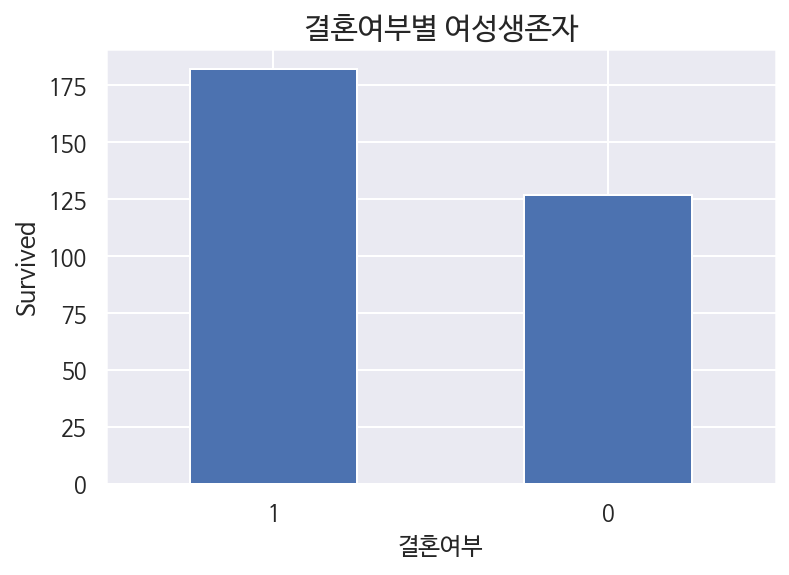

In [110]:
Female["결혼여부"].value_counts().plot(kind='bar')
plt.title("결혼여부별 여성생존자", fontsize=15)
plt.ylabel("Survived", fontsize=12)
plt.xlabel("결혼여부", fontsize=12)

plt.xticks(rotation=0)
plt.show()

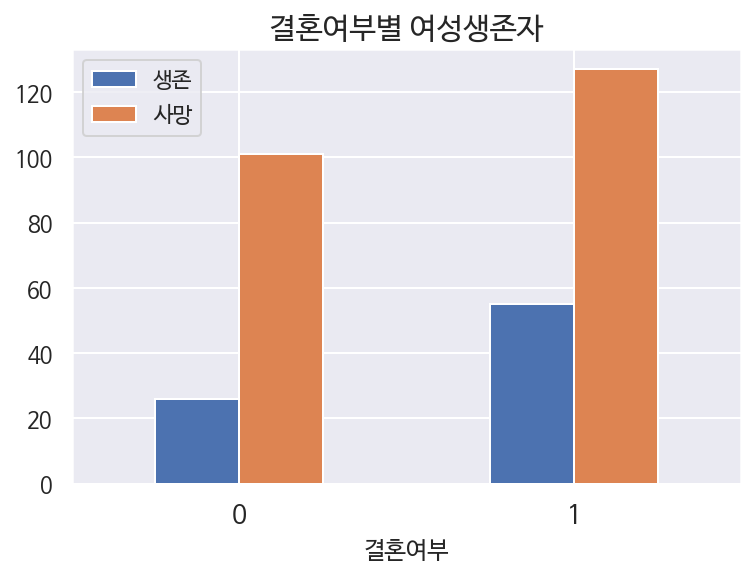

In [107]:

stacked_bar_df.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.legend(["생존", "사망"])
plt.title("결혼여부별 여성생존자", fontsize=15)
plt.show()

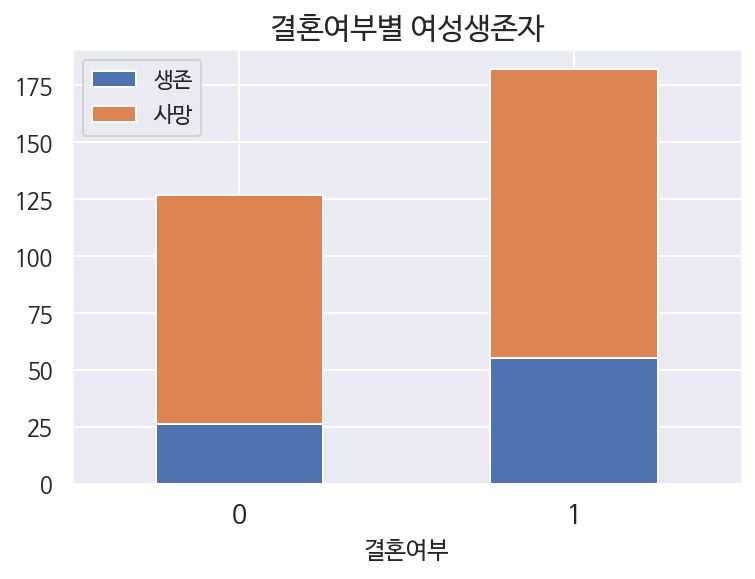

In [112]:
stacked_bar_df.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, fontsize=13)
plt.legend(["생존", "사망"])
plt.title("결혼여부별 여성생존자", fontsize=15)
plt.show() #전체 모집단은 작으나 기혼 여성의 비혼 여성의 총 생존 비율이 더 높다

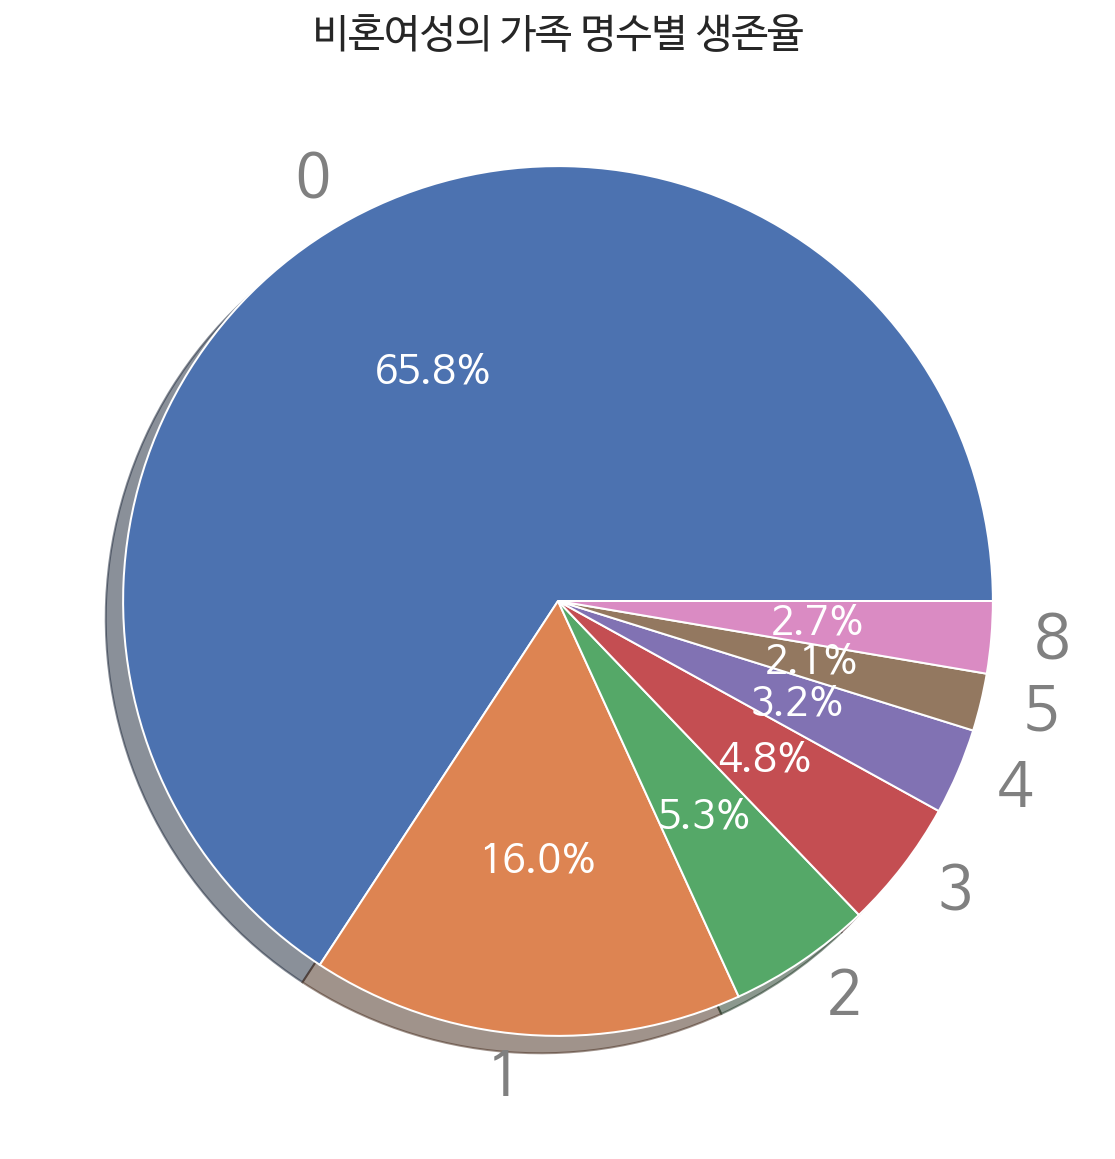

In [138]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("비혼여성의 가족 명수별 생존율", fontsize=20)

labels = ["0", "1", "2", "3", "4", "5", "8"]
sizes  = [123, 30, 10, 9,  6, 4, 5]

_, texts, autotexts = plt.pie(sizes,
                              labels=labels,

                              autopct='%1.1f%%',
                              shadow=True)
                

for t in texts:
  t.set_fontsize(30)
  t.set_color('gray')


for t in autotexts:
  t.set_color("white")
  t.set_fontsize(20)

plt.show()
# 인사이트 -> 비혼 여성의 경우 혼자 여행 갈 때 보다 가족들과 함꼐 여행을 갔을 때 생존율이 높다

In [16]:
stacked_bar_df1 = Female.groupby(["결혼여부","SibSp"]).size().unstack()
stacked_bar_df1

SibSp,0,1,2,3,4,5,8
결혼여부,,,,,,,
0,46.0,76.0,3.0,2.0,NaN,NaN,NaN
1,123.0,30.0,10.0,9.0,6.0,1.0,3.0


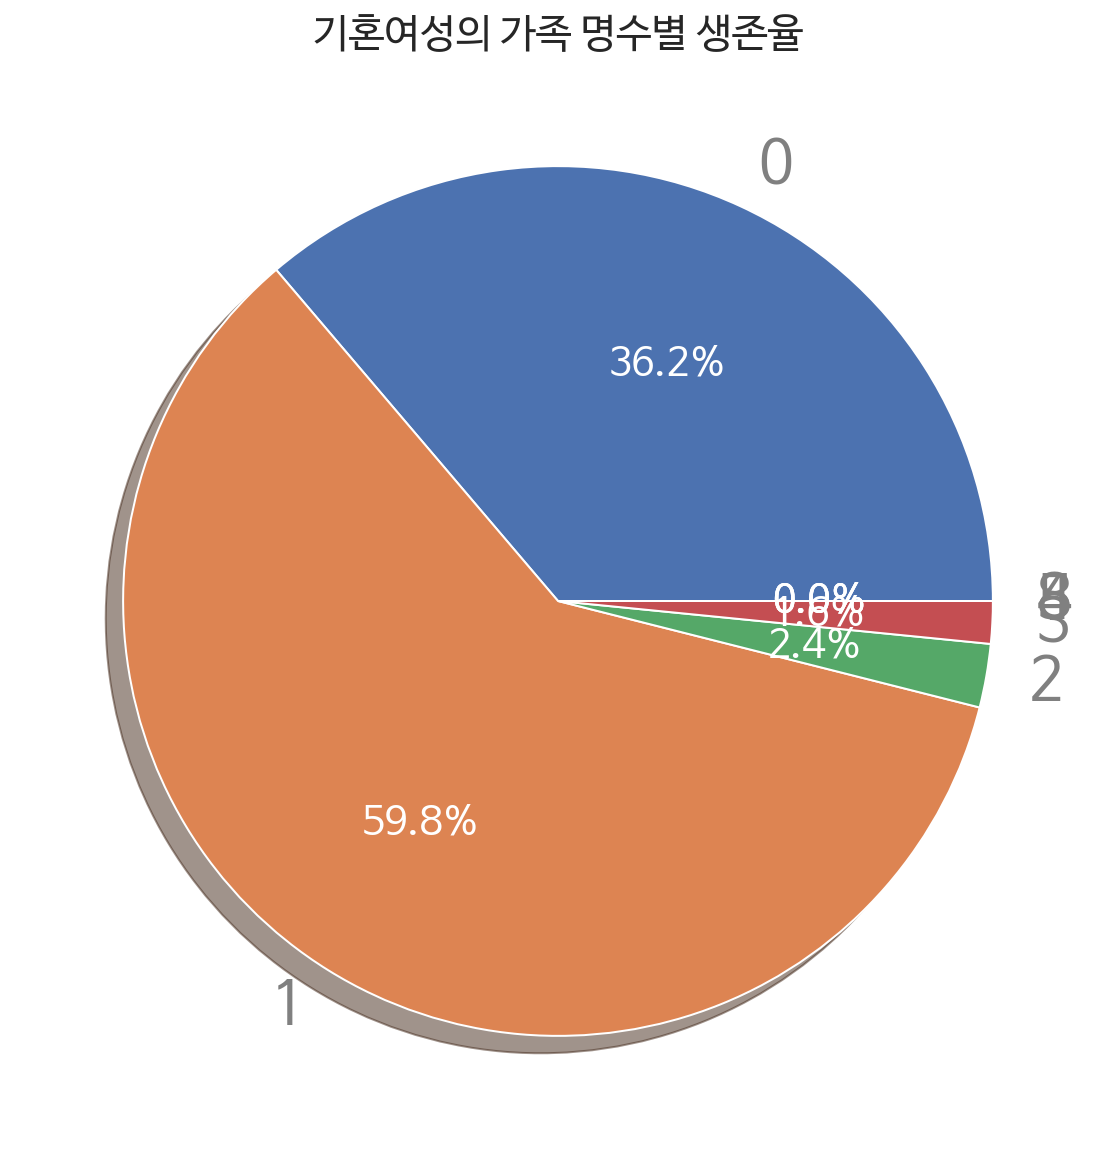

In [137]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.title("기혼여성의 가족 명수별 생존율", fontsize=20)
labels = ["0", "1", "2", "3", "4", "5", "8"]
sizes  = [46, 76, 3, 2,  0, 0, 0] # NaN를 fillna(0)처리해도 되지만 그냥 직접 적음 

_, texts, autotexts = plt.pie(sizes,
                              labels=labels,
                              autopct='%1.1f%%',
                              shadow=True)
                

for t in texts:
  t.set_fontsize(30)
  t.set_color('gray')


for t in autotexts:
  t.set_color("white")
  t.set_fontsize(20)

plt.show() # 인사이트 -> 기혼 여성의 경우 혼자 여행 갈 때 보다 가족들과 함꼐 여행을 갔을 때 생존율이 높다

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

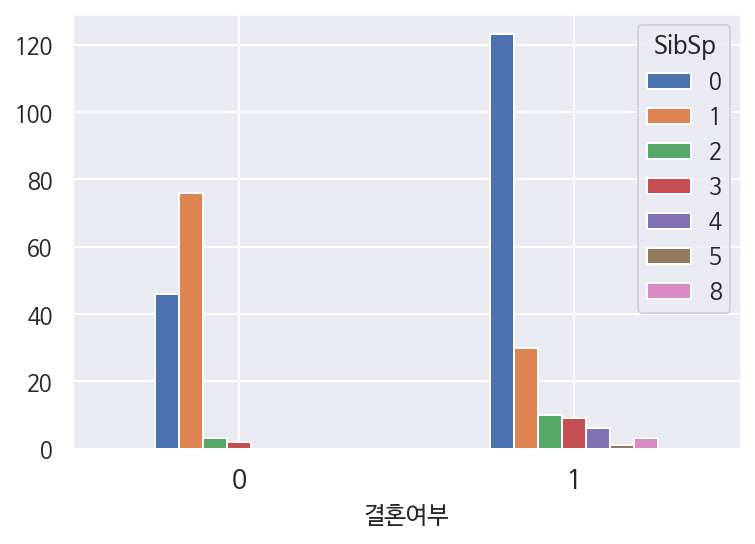

In [58]:
stacked_bar_df1.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)

In [18]:
df_pivot_S = pd.pivot_table(
    Female,
    index='결혼여부',
    columns='SibSp',
    values='Survived'
)

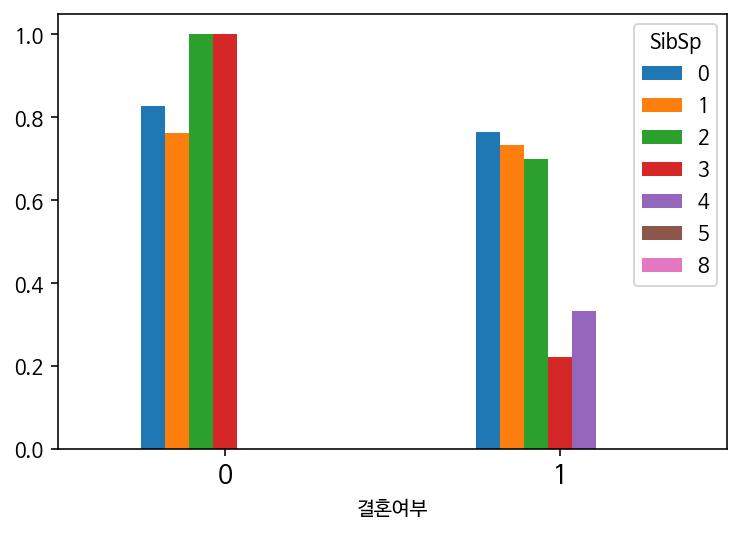

In [19]:
df_pivot_S.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.show()

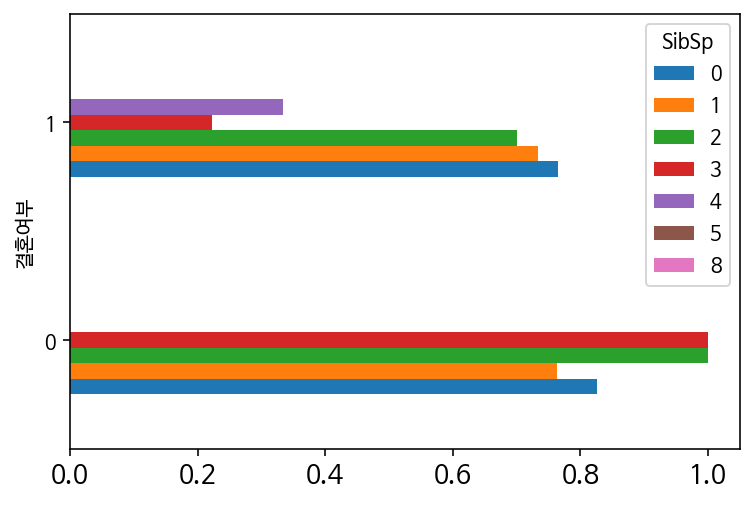

In [20]:
df_pivot_S.plot(kind='barh')
plt.xticks(rotation=0, fontsize=13)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


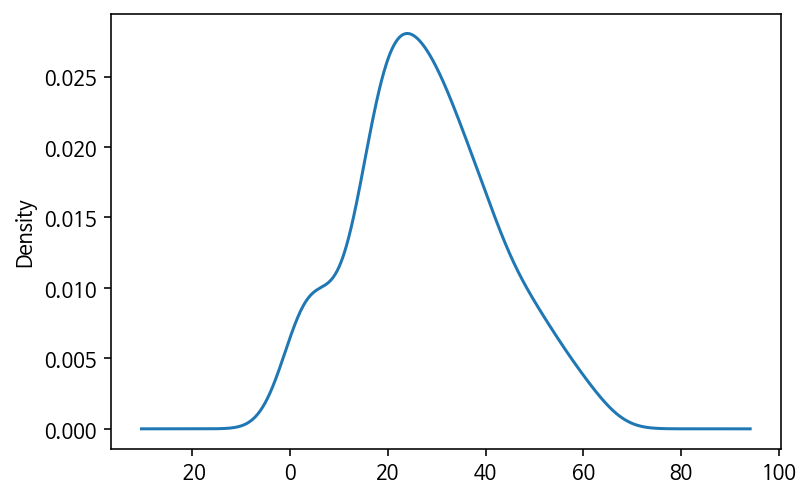

In [21]:
# 연령별 여성 생존율 커널 밀도 그래프
Female['Age'].plot(kind='kde')

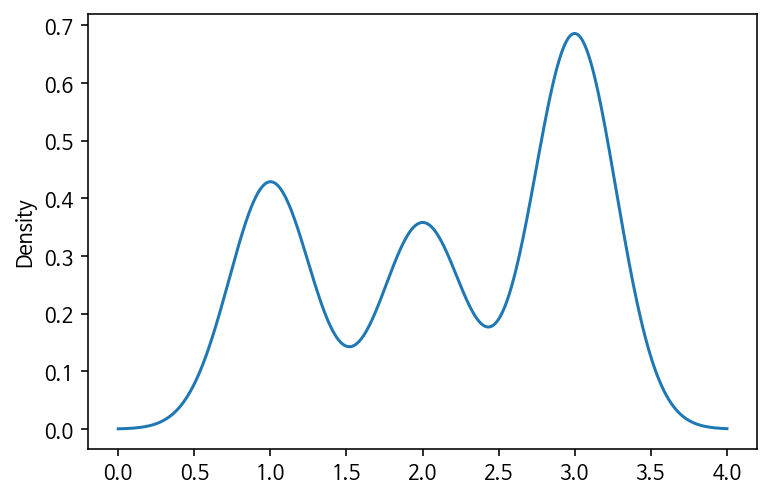

In [22]:
# 클래스별 여성 생존율 커널 밀도 그래프
Female['Pclass'].plot(kind='kde')

In [ ]:
# x = np.arange(1, 3, 0.05)
# y_1 = int("Survived") +1
# y_2 = int("Survived") + 1

# plt.fill_between(x, y_1, color='green', alpha=0.1)
# plt.fill_between(x, y_2, color='blue', alpha=0.2)


# plt.show()

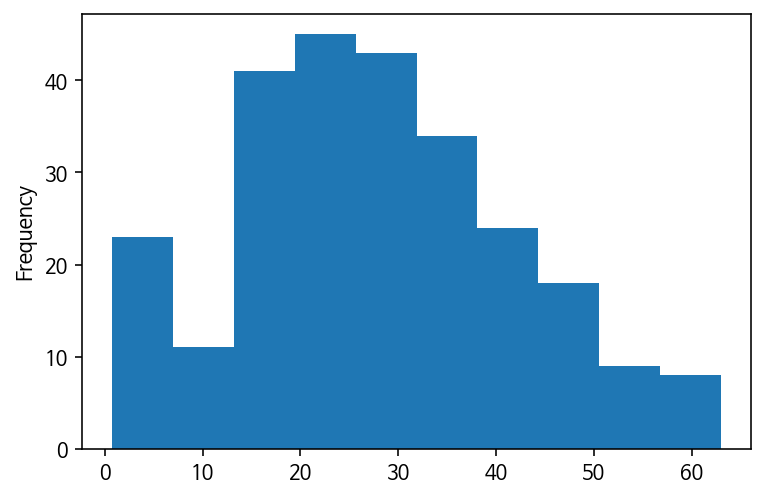

In [23]:
Female['Age'].plot(kind='hist')

In [24]:
female_survival_rate=Female.groupby("Survived")["결혼여부"].count()
female_survival_rate

Survived
0     81
1    228
Name: 결혼여부, dtype: int64

In [142]:
f = Female.copy()

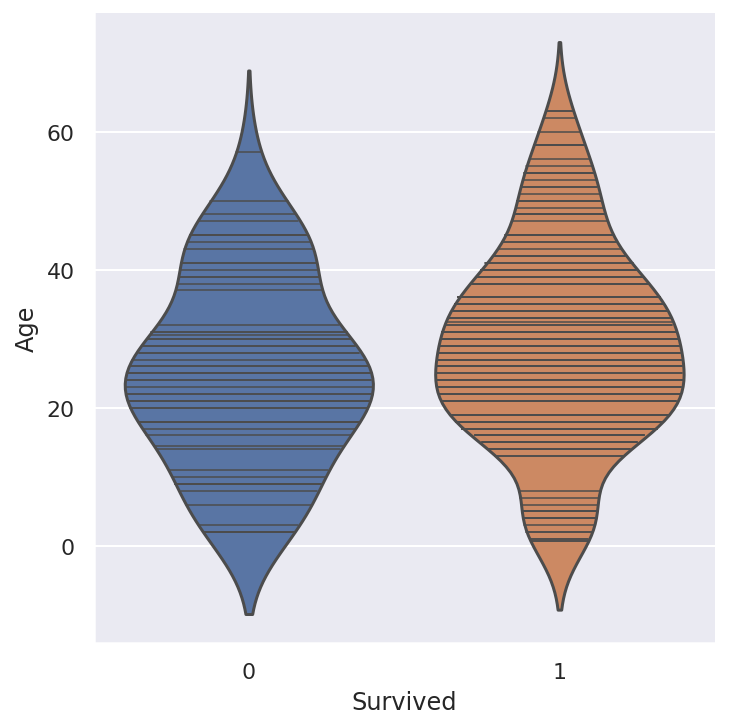

In [178]:
sns.set(style='darkgrid')
sns.catplot(x='Survived', y = 'Age', data=f, kind='violin', inner='stick')
plt.show()

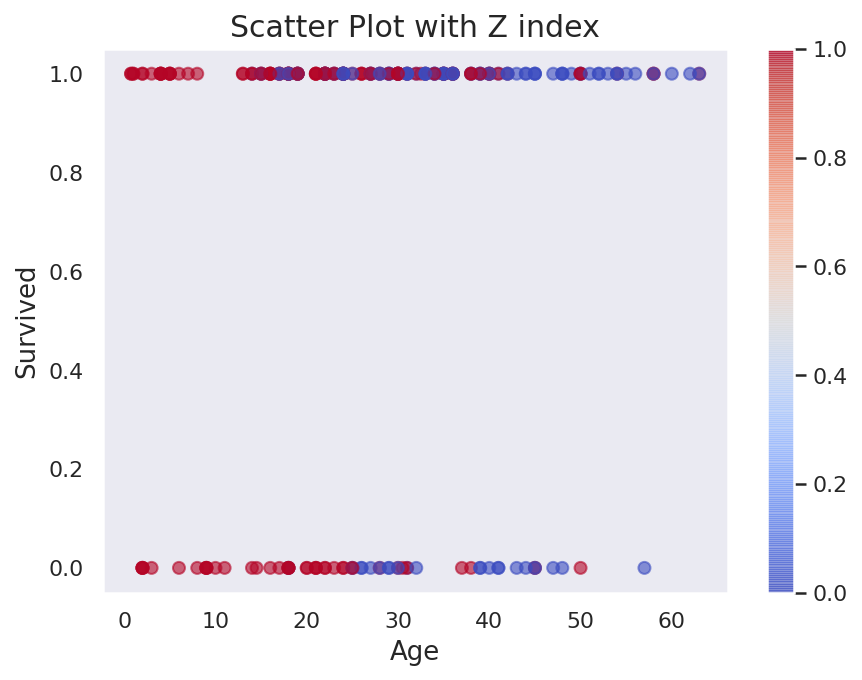

In [174]:
plt.figure(figsize=(7,5))
plt.title("Scatter Plot with Z index", fontsize=15)
plt.scatter(f["Age"], f["Survived"], c=f["결혼여부"], cmap='coolwarm', alpha=.6)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Survived", fontsize=13)
plt.grid()
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_te

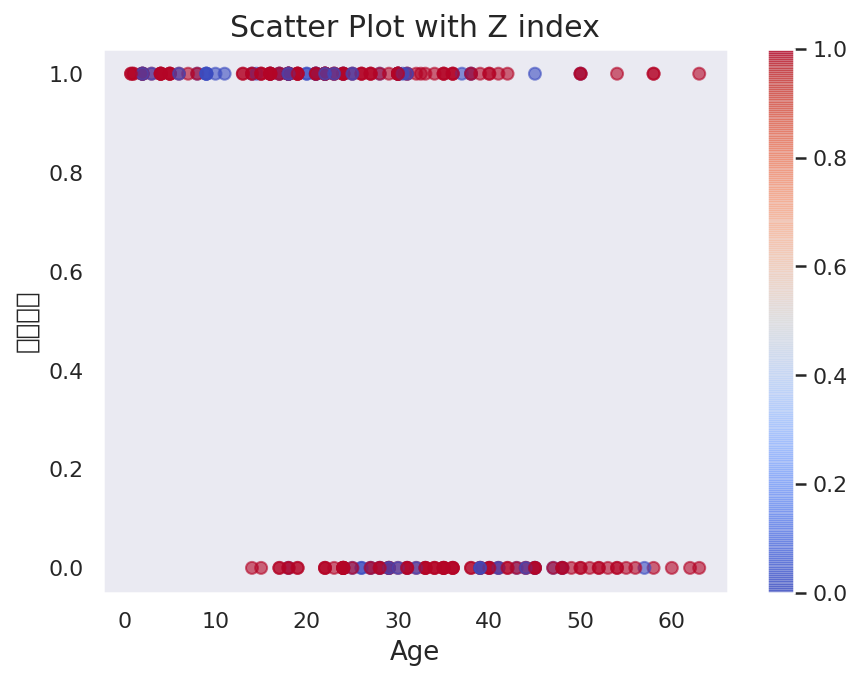

In [175]:
plt.figure(figsize=(7,5))
plt.title("Scatter Plot with Z index", fontsize=15)
plt.scatter(f["Age"], f["결혼여부"], c=f["Survived"], cmap='coolwarm', alpha=.6)
plt.xlabel("Age", fontsize=13)
plt.ylabel("결혼여부", fontsize=13)
plt.grid()
plt.colorbar()
plt.show()

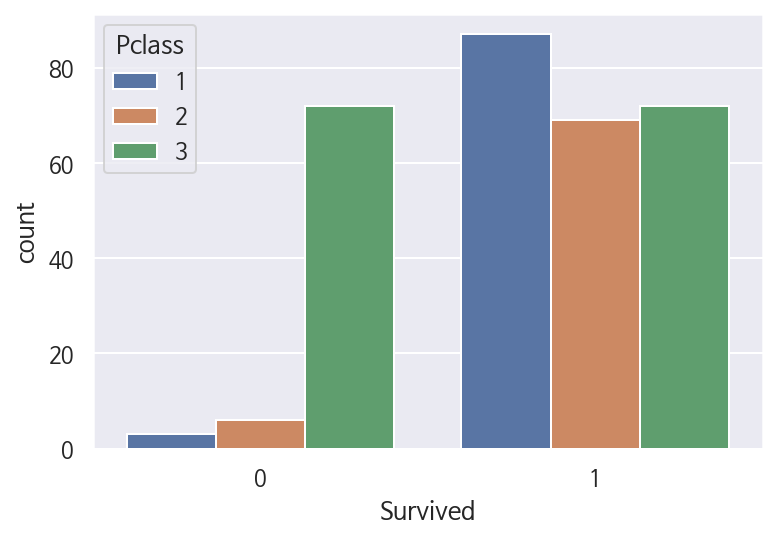

In [35]:
sns.countplot(x='Survived', hue='Pclass', data= f)
plt.show()

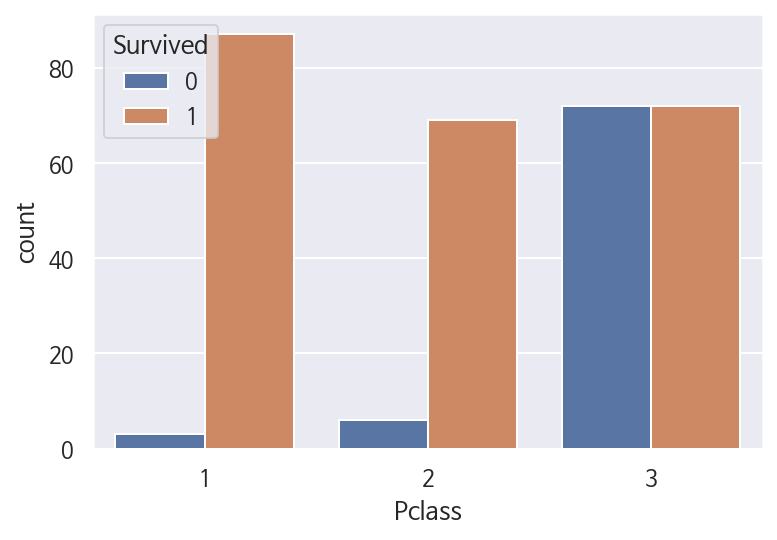

In [36]:
sns.countplot(x='Pclass', hue='Survived', data= f)
plt.show() # 1등급 객실 여성 총 생존자 월등히 높음을 파악할 수 있다 